# Inverted Pendulum with Vertical Excitation

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

### The Inverted Pendulum System Equation of Motion

$$
\begin{gather*}
    \begin{bmatrix}
        \dot{x}_1 \\ \dot{x}_2
    \end{bmatrix} = 
    \begin{bmatrix}
        x_2 \\ -\dfrac{g}{l}\sin x_1 - \dfrac{A\Omega^2}{l}\cos(\Omega t)\sin x_1
    \end{bmatrix}
\end{gather*}
$$

In [2]:
def invPendulum(t, u, l, A, omega):
    g = 9.8
    return [
        u[1],
        g/l * np.sin(u[0]) - A*omega**2/l * np.cos(omega * t) * np.sin(u[0])
    ]

def solve_invPendulum(func, t, tspan, ic, parameters, algorithm='DOP853'):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5)

In [3]:
params = {
    'l': 1.0,
    'A': 0.2,
    'omega': 0
}

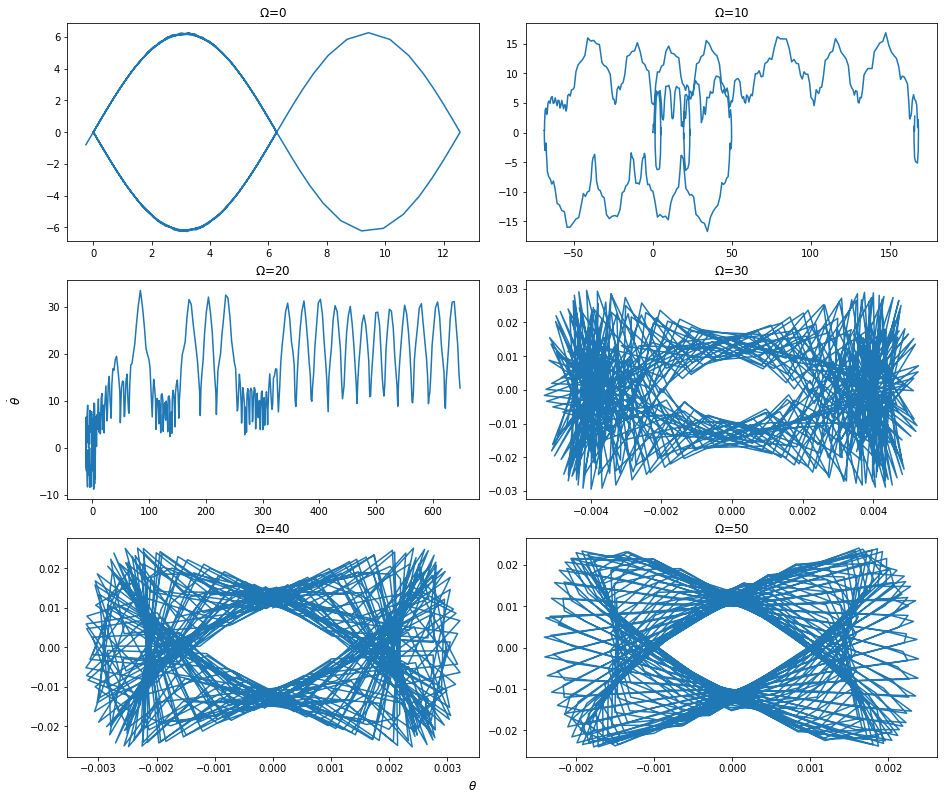

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(13, 11), constrained_layout=True)
T = np.linspace(0, 60, 500)
t_span = (np.min(T), np.max(T))
IC = [0, 0.01]
i = 0
for w in range(0, 51, 10):
    params['omega'] = w
    res = solve_invPendulum(invPendulum, T, t_span, IC, params)
    ax[i//2][i%2].plot(res.y[0, :], res.y[1, :])
    ax[i//2][i%2].set_title(r'$\Omega$='+str(w))
    i += 1
fig.supxlabel(r'$\theta$')
fig.supylabel(r'$\dot{\theta}$')
plt.savefig('../plots/invPendVertExcite_phasePlane.png')
plt.show()

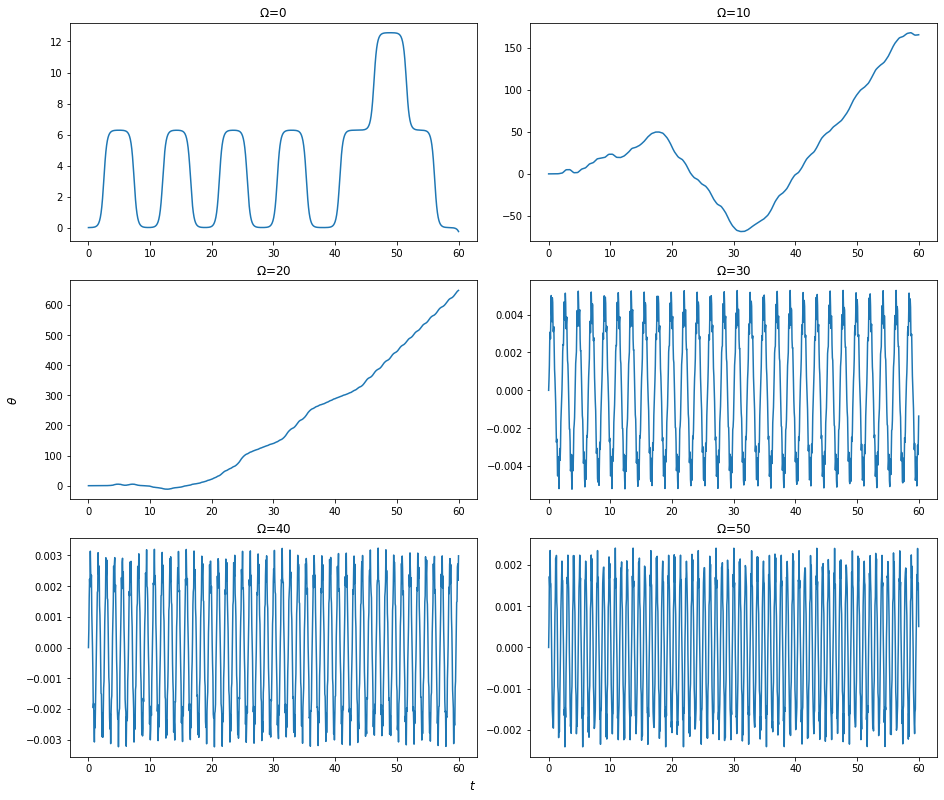

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(13, 11), constrained_layout=True)
T = np.linspace(0, 60, 1000)
t_span = (np.min(T), np.max(T))
IC = [0, 0.01]
i = 0
for w in range(0, 51, 10):
    params['omega'] = w
    res = solve_invPendulum(invPendulum, T, t_span, IC, params)
    ax[i//2][i%2].plot(T, res.y[0, :])
    ax[i//2][i%2].set_title(r'$\Omega$='+str(w))
    i += 1
fig.supylabel(r'$\theta$')
fig.supxlabel(r'$t$')
plt.savefig('../plots/invPendVertExcite_theta_over_time.png')
plt.show()